# Exercício 3 - Classificação
Aluna: Maria Eduarda Guedes Pinto Gianisella

# Árvore de decisão

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Importar o dataset
df = pd.read_csv('titanic.csv')


Pré-processamento dos dados

In [45]:
# Lidar com características categóricas usando codificação one-hot
df = pd.get_dummies(df)

# Separar as features e o target
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balanceamento de classes usando SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Treinamento da árvore de decisão

In [46]:
dt_classifier = DecisionTreeClassifier(random_state=42)

# Definir os hiperparâmetros a serem testados
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Executar a busca em grade no conjunto de treinamento resampleado
grid_search.fit(X_train_resampled, y_train_resampled)

# Obter o melhor modelo e seus hiperparâmetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

Visualização dos resultados

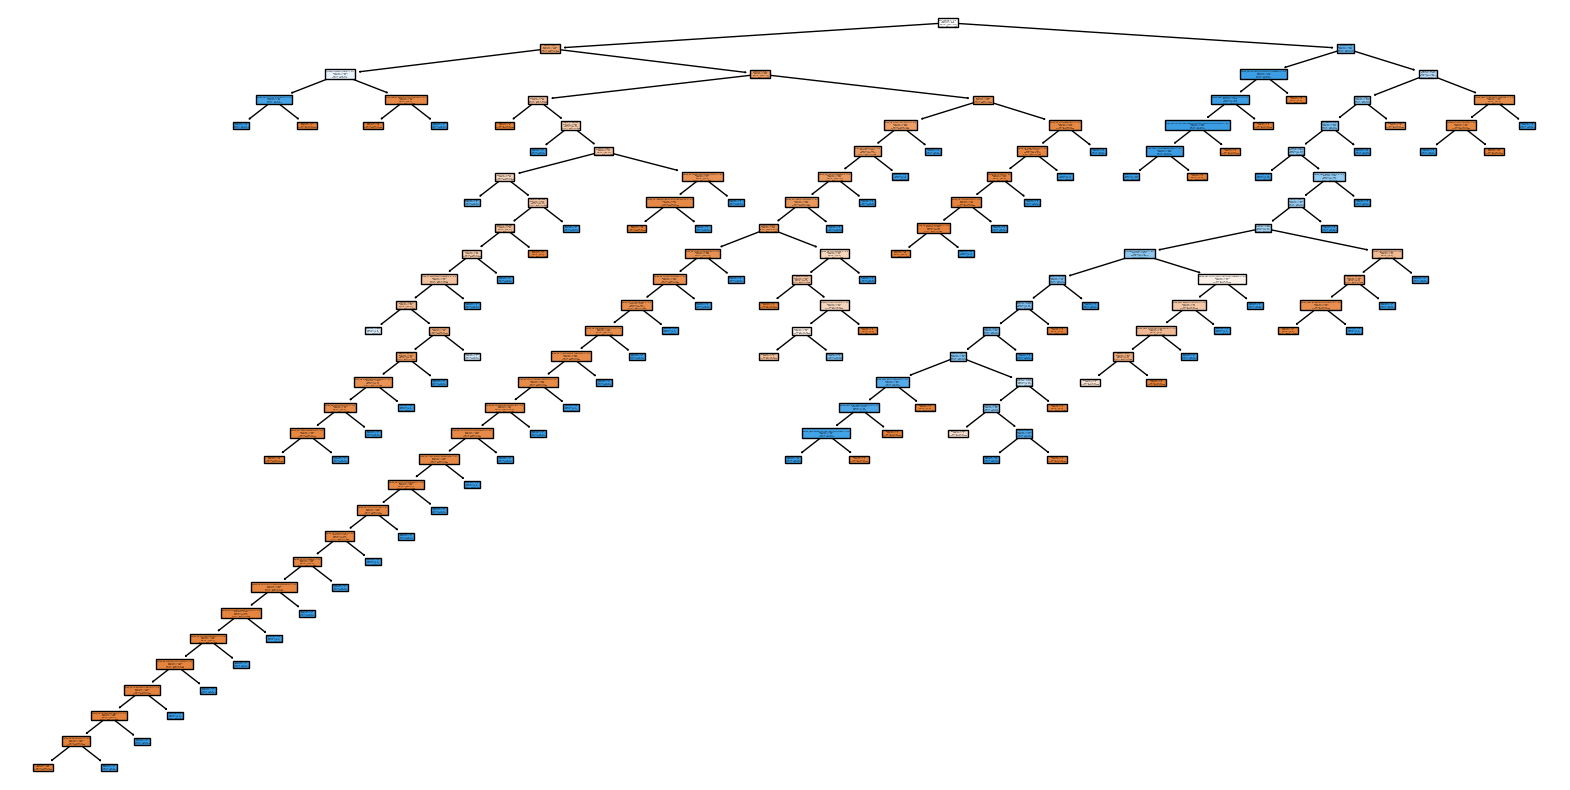

Acurácia do modelo: 81.46%


In [47]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

# Avaliar o modelo no conjunto de teste
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Acurácia do modelo: {:.2f}%".format(accuracy * 100))


Calcular a acurácia usando validação cruzada 10-fold

In [48]:
scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=10)

# Calcular a média das acurácias
mean_accuracy = np.mean(scores)

print("Acurácia média usando validação cruzada 10-fold: {:.2f}%".format(mean_accuracy * 100))


Acurácia média usando validação cruzada 10-fold: 86.42%


# Discussão dos resultados:

o valor médio de acurácia utilizando a estratégia de validação cruzada 10-fold fornece uma estimativa mais confiável do desempenho do modelo, já que é utilizado todo o conjunto de dados para treinamento e teste de forma mais abrangente. Isso permite avaliar melhor a capacidade de generalização do modelo. Como a acurácia média foi alta (86.42%), isso sugere que o modelo está conseguindo aprender padrões úteis nos dados e generalizar bem para novos exemplos.

# k-Nearest Neighbors

In [49]:
# Importar o dataset
df = pd.read_csv('titanic.csv')


Pré-processamento dos dados

In [50]:
df = pd.get_dummies(df)

# Separar as features e o target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Treinamento do modelo

In [51]:
# Valores de k vizinhos a serem testados
k_values = [2, 3, 4, 5, 6, 7]

# Iterar sobre os diferentes valores de k vizinhos
for k in k_values:
    # Construir o modelo k-NN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Treinar o modelo
    knn_classifier.fit(X_train_scaled, y_train)
    
    # Fazer previsões
    y_pred = knn_classifier.predict(X_test_scaled)
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Acurácia para k = {}: {:.2f}%".format(k, accuracy * 100))

Acurácia para k = 2: 77.53%
Acurácia para k = 3: 79.78%
Acurácia para k = 4: 80.90%
Acurácia para k = 5: 78.09%
Acurácia para k = 6: 78.65%
Acurácia para k = 7: 76.40%


# Discussão dos resultados

Houve variação significativa nos diferentes modelos testados? Os resultados foram bem próximos, variando de 75.4% (k = 7) até 80.9% (k = 4)
Algum deles foi melhor do que a estratégia baseada em árvore de decisão? Nenhum deles alcançou acurácia maior que o modelo de árvore de decisão